Análisis Exploratorio de los Datos

In [29]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, silhouette_score




In [30]:
# Cargar los datos
file_path = "RIJA _ Iniciativas de Participacion Ciu dadana en el Poder Judicial - Mapeo.xlsx"
data = pd.read_excel(file_path, sheet_name='Mapeo de Casos')

# Limpieza preliminar de datos
data.dropna(how='all', inplace=True)  # Eliminar filas que están completamente vacías
data.fillna(method='ffill', inplace=True)  # Rellenar valores faltantes hacia adelante donde sea apropiado

In [31]:
# Mostrar información básica sobre el conjunto de datos
print("Descripción general del dataset:")
print()
print(data.info())
print()
print()
print("Ejemplo de los datos:")
print()
print(data.head())

Descripción general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   #                                      81 non-null     int64  
 1   Región                                 81 non-null     object 
 2   País                                   81 non-null     object 
 3   Unidad Subnacional                     74 non-null     object 
 4   Institución                            81 non-null     object 
 5   Tipo de Institución                    81 non-null     object 
 6   Nivel de Jurisdicción                  81 non-null     object 
 7   Iniciativa                             81 non-null     object 
 8   Descripción                            81 non-null     object 
 9   Nivel de Participación (Manual CEPAL)  81 non-null     object 
 10  Fomato                                 81 

In [32]:
# Análisis Estadístico Básico
print("Análisis Estadístico Básico:")
print()
print(data.describe())

Análisis Estadístico Básico:

               #  Relevancia
count  81.000000         0.0
mean   41.000000         NaN
std    23.526581         NaN
min     1.000000         NaN
25%    21.000000         NaN
50%    41.000000         NaN
75%    61.000000         NaN
max    81.000000         NaN


In [33]:
# Reemplazar celdas vacías y valores "N/A" por NaN
data = data.replace(['', 'N/A'], pd.NA)

# Crear un diccionario para almacenar el conteo de valores únicos de cada columna
unique_values_count = {}

# Contar valores únicos en cada columna, excluyendo NaN
for column in data.columns:
    unique_values_count[column] = data[column].dropna().nunique()

# Convertir el diccionario a un DataFrame para una mejor visualización
unique_values_df = pd.DataFrame(unique_values_count, index=['Unique Values Count']).T

print(unique_values_df)

                                       Unique Values Count
#                                                       81
Región                                                   5
País                                                    35
Unidad Subnacional                                      10
Institución                                             55
Tipo de Institución                                      5
Nivel de Jurisdicción                                    3
Iniciativa                                              74
Descripción                                             79
Nivel de Participación (Manual CEPAL)                    4
Fomato                                                   3
Perspectiva de Política Pública                          3
Estadío                                                  2
Evaluación de Resultados                                 2
Impacto                                                  3
Impulsores                                              

Distribución de Región:
América Latina       50
África               13
Europa                9
Asia                  8
América del Norte     1
Name: Región, dtype: int64


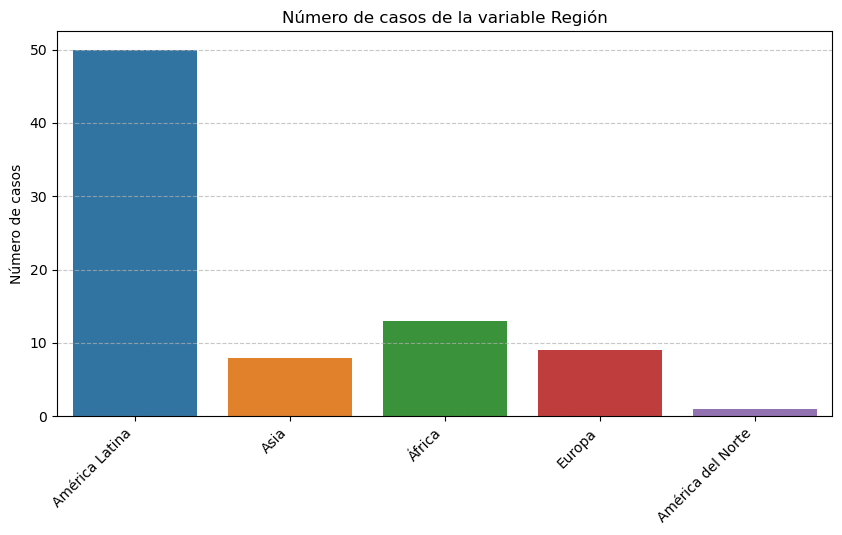

Distribución de Tipo de Institución:
Poder Judicial                          62
Consejo de Magistratura / Judicatura    12
Otros Organismos                         3
Defensoría                               3
Fiscalía                                 1
Name: Tipo de Institución, dtype: int64


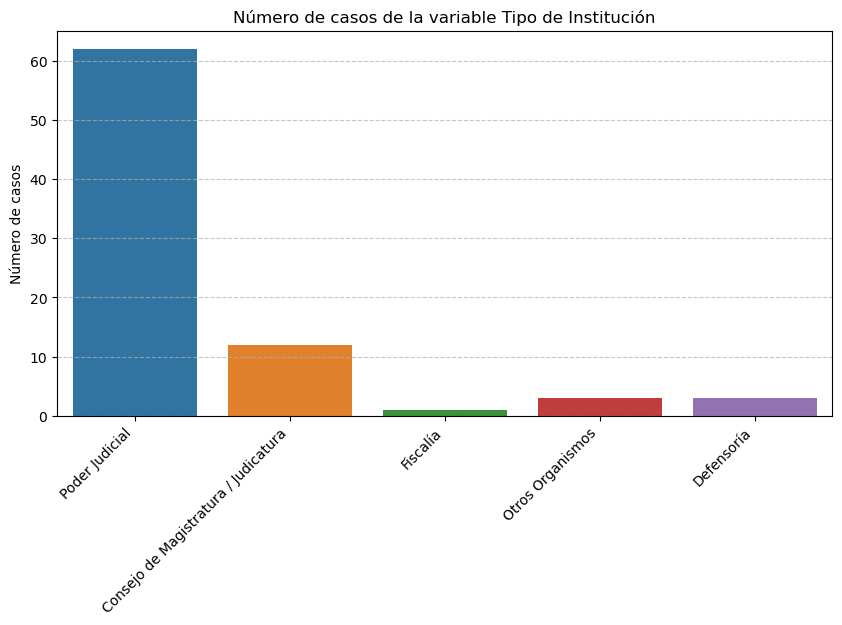

Distribución de Nivel de Jurisdicción:
Nacional       66
Subnacional    12
Local           3
Name: Nivel de Jurisdicción, dtype: int64


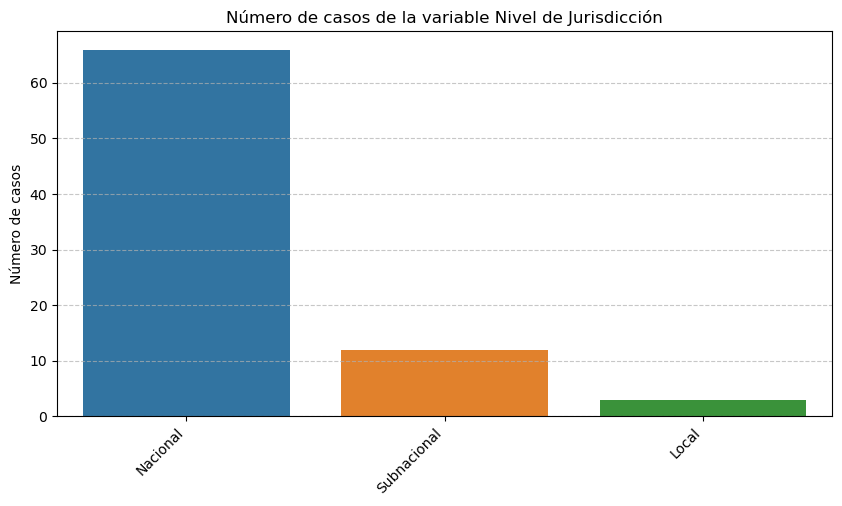

Distribución de Nivel de Participación (Manual CEPAL):
2. Nivel Consultivo     61
1. Nivel Informativo    13
3. Nivel Decisorio       4
4. Nivel Co-Gestión      3
Name: Nivel de Participación (Manual CEPAL), dtype: int64


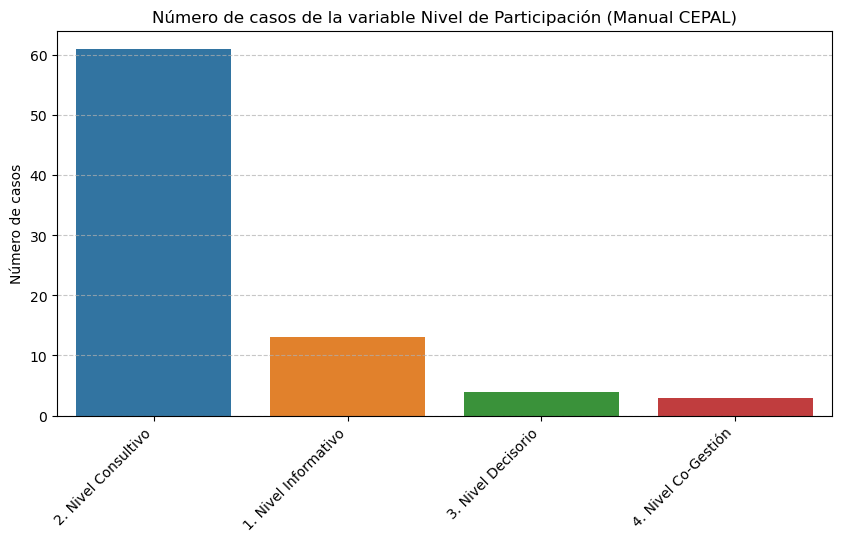

Distribución de Fomato:
Presencial    49
Híbrido       20
Digital       12
Name: Fomato, dtype: int64


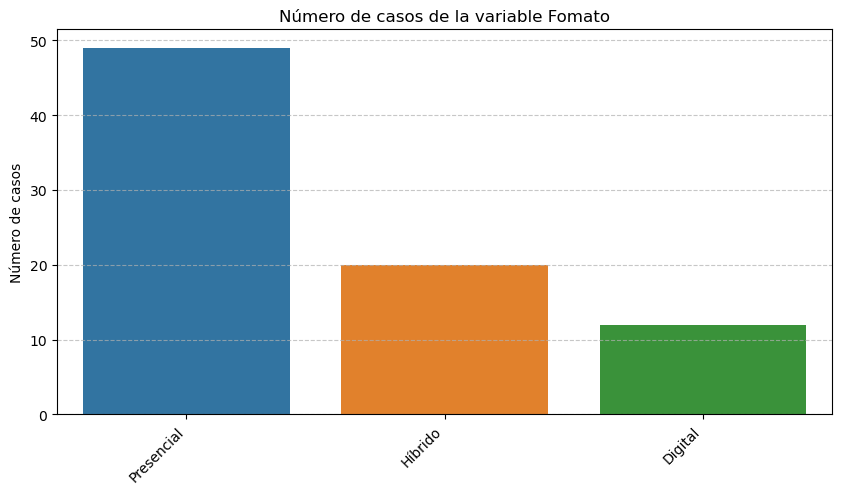

Distribución de Perspectiva de Política Pública:
Implementación            41
Planificación             20
Monitoreo y Evaluación    20
Name: Perspectiva de Política Pública, dtype: int64


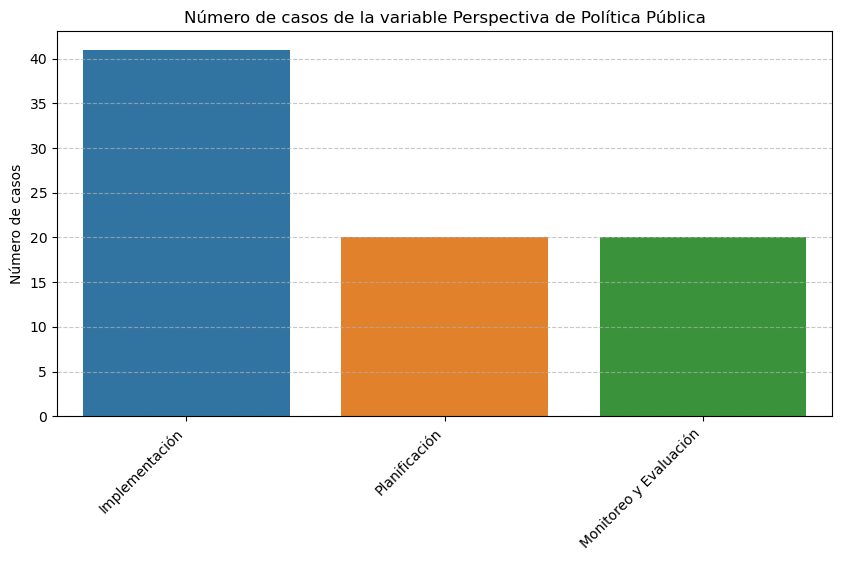

Distribución de Estadío:
Vigente      64
Concluido    17
Name: Estadío, dtype: int64


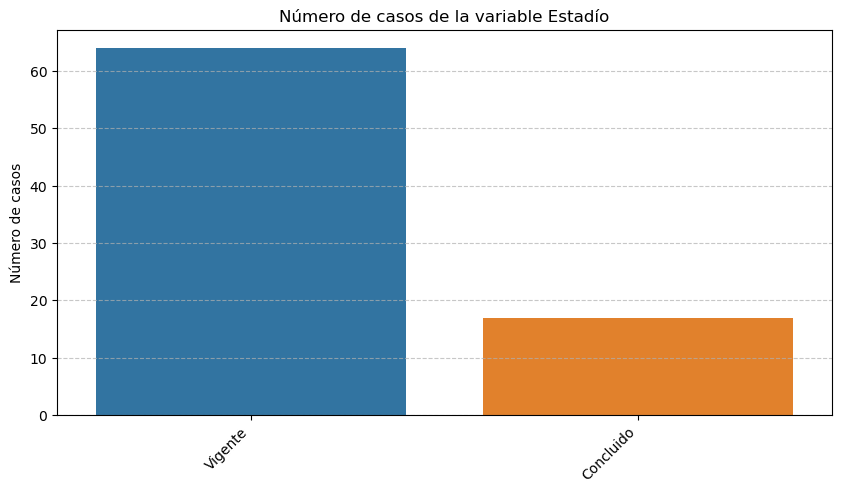

Distribución de Evaluación de Resultados:
Cuantitativa    45
Cualitativa     36
Name: Evaluación de Resultados, dtype: int64


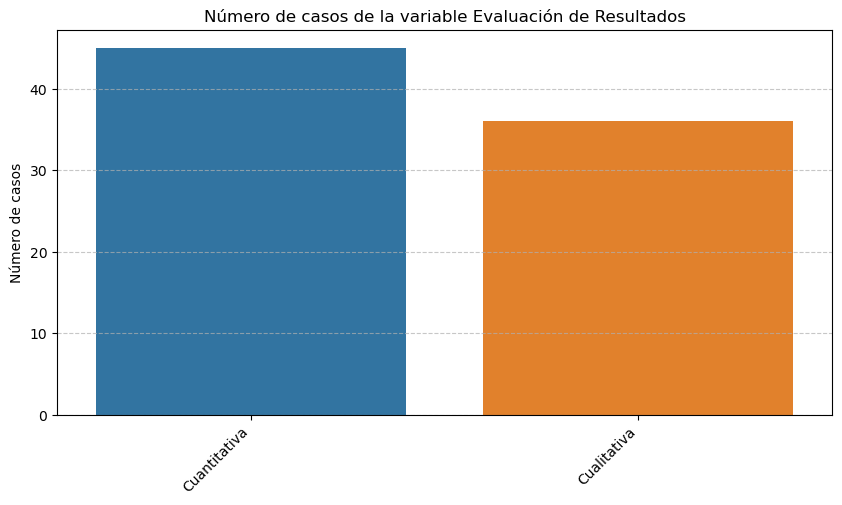

Distribución de Impulsores:
Iniciativa Propia            52
Poder Legislativo            11
Poder Ejecutivo               7
Sociedad Civil Organizada     6
Organismo Internacional       5
Name: Impulsores, dtype: int64


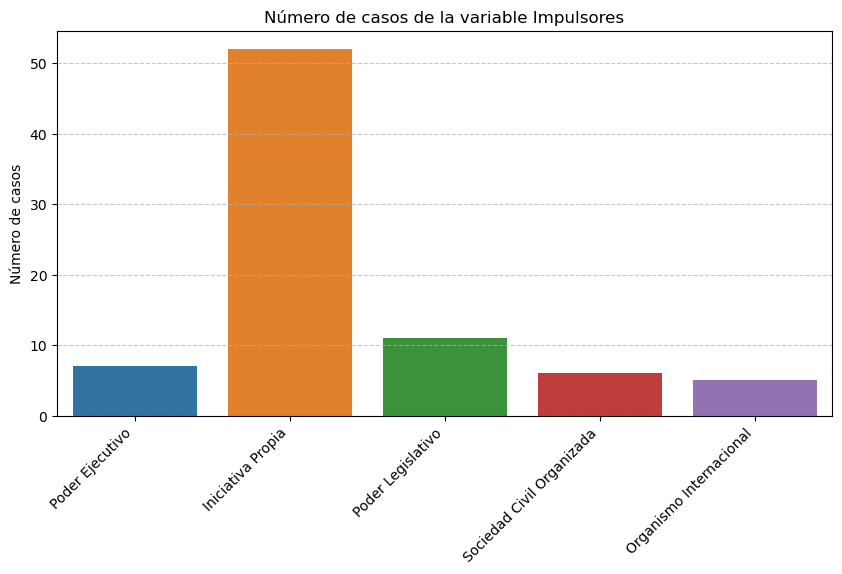

Distribución de Población Objetivo:
Ciudadanía en General                                   54
Usuarios del Poder Judicial                             14
Grupo Específcio (Juventudes, Mujeres, entre otros.)    13
Name: Población Objetivo, dtype: int64


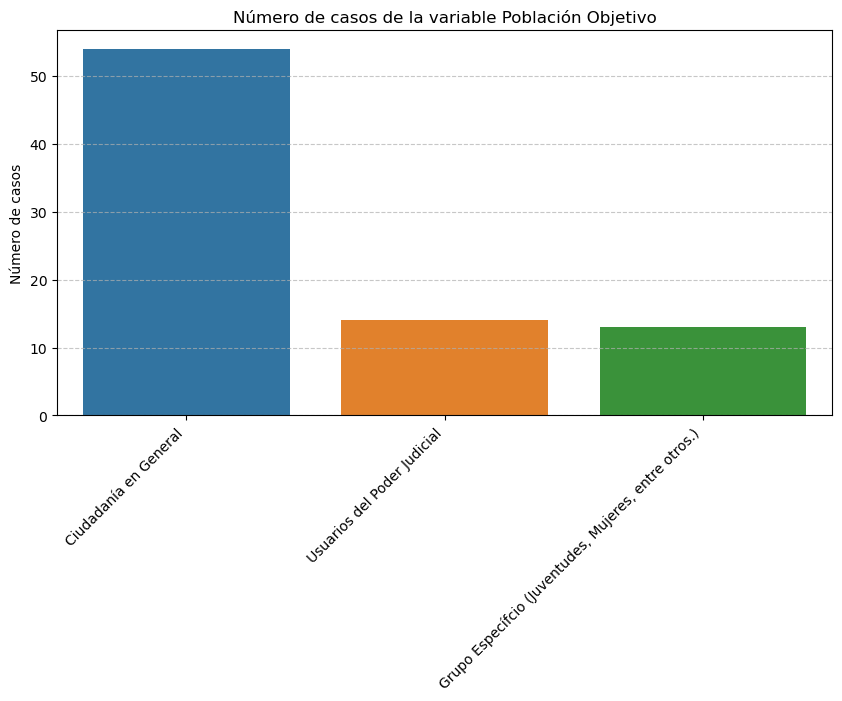

Distribución de Caracterización Preliminar (MZ):
2    35
1    32
3    13
-     1
Name: Caracterización Preliminar (MZ), dtype: int64


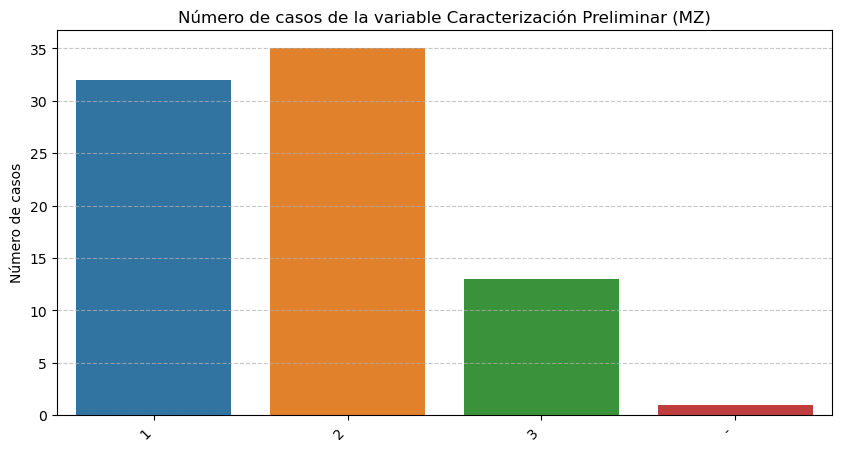

In [34]:
# Distribución de datos categóricos
categorical_columns = ['Región', 'Tipo de Institución',"Nivel de Jurisdicción", 'Nivel de Participación (Manual CEPAL)',"Fomato","Perspectiva de Política Pública","Estadío","Evaluación de Resultados","Impulsores","Población Objetivo","Caracterización Preliminar (MZ)"]

for column in categorical_columns:
    print(f"Distribución de {column}:")
    print(data[column].value_counts())
    
    plt.figure(figsize=(10, 5))
    
    # Crear el gráfico de barras
    sns.countplot(x=column, data=data)
    
    # Rotar etiquetas del eje x
    plt.xticks(rotation=45, ha='right')
    
    # Añadir título y etiquetas de ejes
    plt.title(f"Número de casos de la variable {column}")
    plt.xlabel("")
    plt.ylabel("Número de casos")
    
    # Añadir cuadrícula
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Mostrar el gráfico
    plt.show()  

Distribución de País:
Brasil                  10
Argentina                9
Costa Rica               8
Sudáfrica                5
Colombia                 4
Bolivia                  4
República Dominicana     4
Australia                3
Chile                    2
Eslovaquia               2
Paraguay                 2
México                   2
Francia                  2
Nigeria                  2
Kenya                    2
Tailandia                1
Honduras                 1
Georgia                  1
España                   1
Escocia                  1
Estados Unidos           1
Perú                     1
Corea del Sur            1
Bangladesh               1
Martinique               1
Albania                  1
Japón                    1
Kosovo                   1
Puerto Rico              1
Jamaica                  1
Liberia                  1
Ghana                    1
Uganda                   1
Tanzania                 1
Reino Unido              1
Name: País, dtype: int64


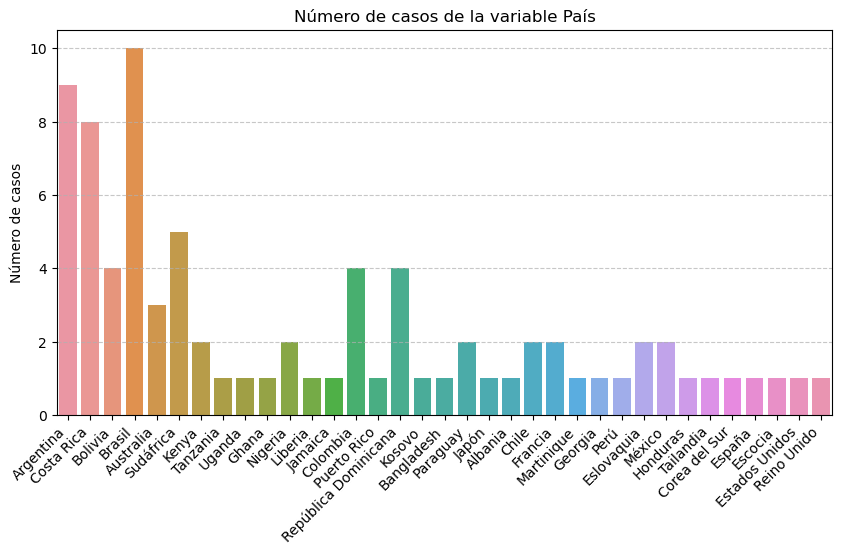

In [37]:
# Número de casos por Países
print(f"Distribución de País:")
print(data["País"].value_counts())

plt.figure(figsize=(10, 5))

# Crear el gráfico de barras
sns.countplot(x="País", data=data)

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Añadir título y etiquetas de ejes
plt.title(f"Número de casos de la variable País")
plt.xlabel("")
plt.ylabel("Número de casos")

# Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

       0
44  1947
21  1996
36  1996
22  1996
20  1996
Distribución de los datos en el tiempo


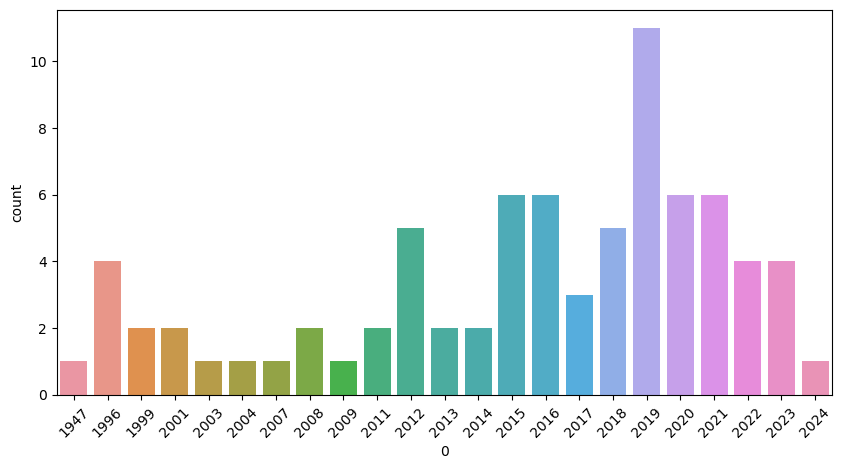

In [ ]:
# Distribución en el tiempo de los datos 
data_year=data['Año de Inicio'].copy()
data_year=pd.DataFrame([x for x in data_year if isinstance(x,int)])
data_year.sort_values(by=0,ascending=True, inplace=True)
print(data_year.head())

print("Distribución de los datos en el tiempo")
#print(data_year.value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(x=data_year[0], data=data_year)
plt.xticks(rotation=45)
plt.show()   

In [ ]:
data_year.head()


,0
44,1947
21,1996
36,1996
22,1996
20,1996


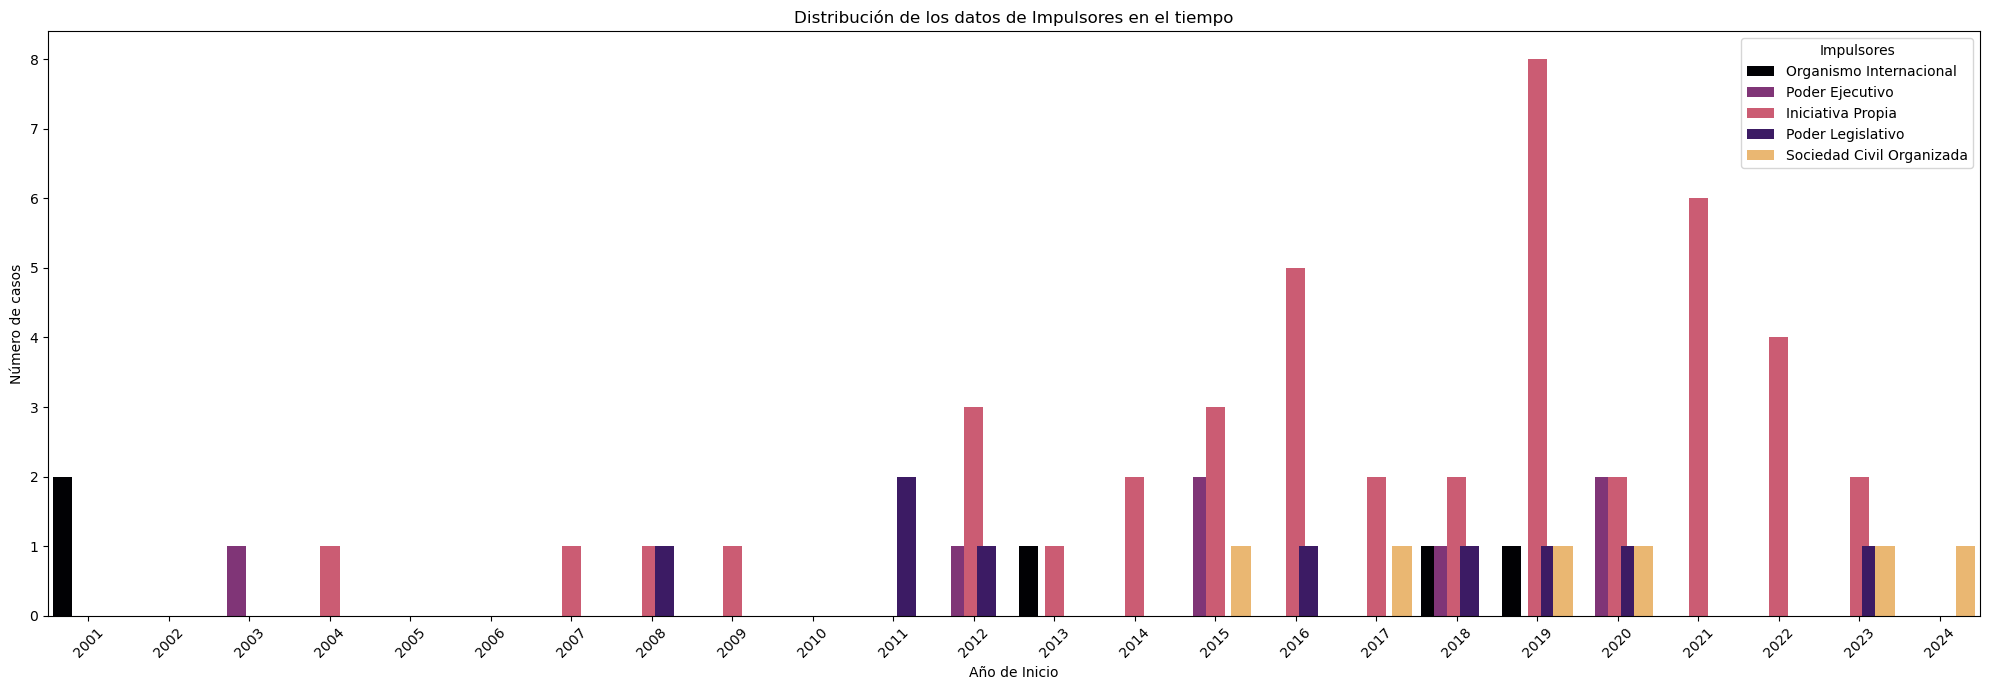

In [ ]:
# Copia de los datos y conversión a enteros
data_year_impulsores = data[['Año de Inicio', 'Impulsores']].copy()
data_year_impulsores = data_year_impulsores[pd.to_numeric(data_year_impulsores["Año de Inicio"], errors='coerce').notnull()]
data_year_impulsores["Año de Inicio"] = data_year_impulsores["Año de Inicio"].astype(int)

# Filtrar datos anteriores al año 2001
data_year_impulsores = data_year_impulsores[data_year_impulsores["Año de Inicio"] >= 2001]
data_year_impulsores.sort_values(by="Año de Inicio", ascending=True, inplace=True)

# Rellenar años faltantes
all_years = pd.DataFrame({'Año de Inicio': range(data_year_impulsores["Año de Inicio"].min(), data_year_impulsores["Año de Inicio"].max() + 1)})
data_year_impulsores = all_years.merge(data_year_impulsores, on='Año de Inicio', how='left')

# Colores amigables para daltónicos con mayor diferencia entre los mismos
#color_palette = sns.color_palette("magma", n_colors=5)  # Puedes ajustar el número de colores

# Define una paleta de colores con 5 colores de la paleta magma
custom_palette = ["#000004", "#8C2981", "#DE4968","#3B0F70","#FEBA5E"]

# Plot
plt.figure(figsize=(20, 7))
bar_plot = sns.countplot(data=data_year_impulsores, x="Año de Inicio", hue="Impulsores", palette=custom_palette, dodge=True)

# Aumentar el ancho de las barras y ajustar la separación entre barras de diferentes categorías
for patch in bar_plot.patches:
    current_width = patch.get_width()
    diff = current_width * 0.5  # Ajuste el valor de 'diff' para hacer las barras más anchas
    patch.set_width(current_width + diff)
    patch.set_x(patch.get_x() - diff/2)

plt.xticks(rotation=45)
plt.xlabel("Año de Inicio")
plt.ylabel("Número de casos")
plt.title("Distribución de los datos de Impulsores en el tiempo")
plt.legend(title='Impulsores')
plt.tight_layout()
plt.show()

    Año de Inicio          Región
44         1947.0  América Latina
21         1996.0          África
36         1996.0  América Latina
22         1996.0          África
20         1996.0            Asia
Distribución de los datos de Región en el tiempo
Año de Inicio  Región           
2019.0         América Latina       10
2016.0         América Latina        5
2015.0         América Latina        4
2021.0         América Latina        4
2022.0         América Latina        4
2020.0         Asia                  3
               América Latina        3
2023.0         Europa                3
1996.0         África                2
2012.0         América Latina        2
2018.0         América Latina        2
2015.0         África                2
2013.0         América Latina        2
2012.0         Europa                2
2017.0         América Latina        2
2008.0         América Latina        2
2001.0         África                2
2019.0         América del Norte     1
2021.0      

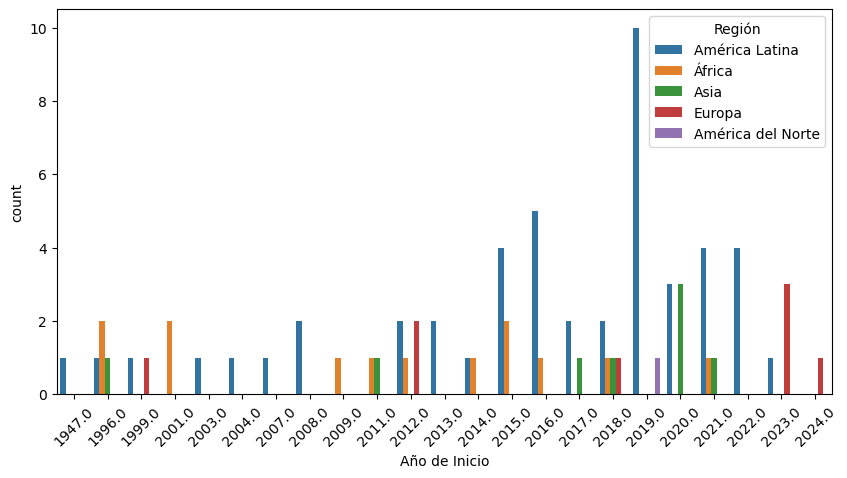

In [ ]:
# Distribución en el tiempo de los datos 
data_year_region=data[['Año de Inicio','Región']].copy()
data_year_region["Año de Inicio"]=pd.DataFrame([x for x in data_year_region["Año de Inicio"] if isinstance(x,int)])
data_year_region.sort_values(by="Año de Inicio",ascending=True, inplace=True)
print(data_year_region.head())

print("Distribución de los datos de Región en el tiempo")
print(data_year_region.value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=data_year_region, x=data_year_region["Año de Inicio"], hue=data_year_region["Región"], orient="h")
#sns.countplot(x=data_year[0], data=data_year)
plt.xticks(rotation=45)
plt.show() 

In [ ]:

# Ingeniería de características
data['Year'] = pd.to_datetime(data['Año de Inicio'], errors='coerce').dt.year
data["Región_num"]=data['Región']
data["Región_num"][0]
#Cambiar nombre de regiones por categorías numéricas:
#América Latina       1
#América del Norte    2
#Europa               3
#África               4
#Asia                 5

    




'América Latina'

In [ ]:
data['Región_num'] = 0  # Initialize the 'Región_num' column with default values

for i, case in data.iterrows():
    if case['Región'] == 'América Latina':
        data.at[i, 'Región_num'] = 1
    elif case['Región'] == 'América del Norte':
        data.at[i, 'Región_num'] = 2
    elif case['Región'] == 'Europa':
        data.at[i, 'Región_num'] = 3
    elif case['Región'] == 'África':
        data.at[i, 'Región_num'] = 4
    elif case['Región'] == 'Asia':
        data.at[i, 'Región_num'] = 5
    else:
        data.at[i, 'Región_num'] = 6

print(data["Región_num"].head())

0    1
1    1
2    1
3    1
4    1
Name: Región_num, dtype: int64


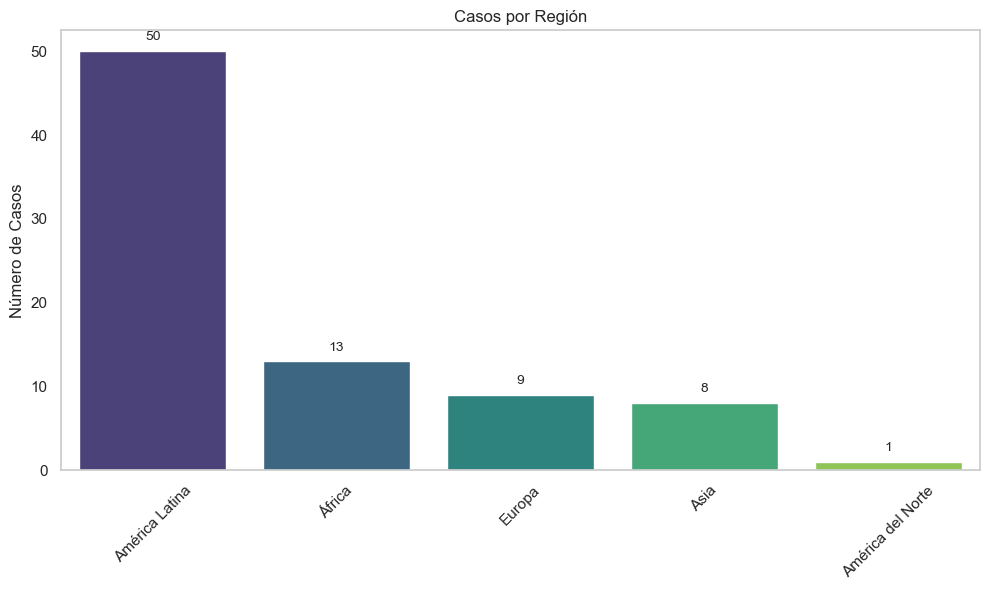

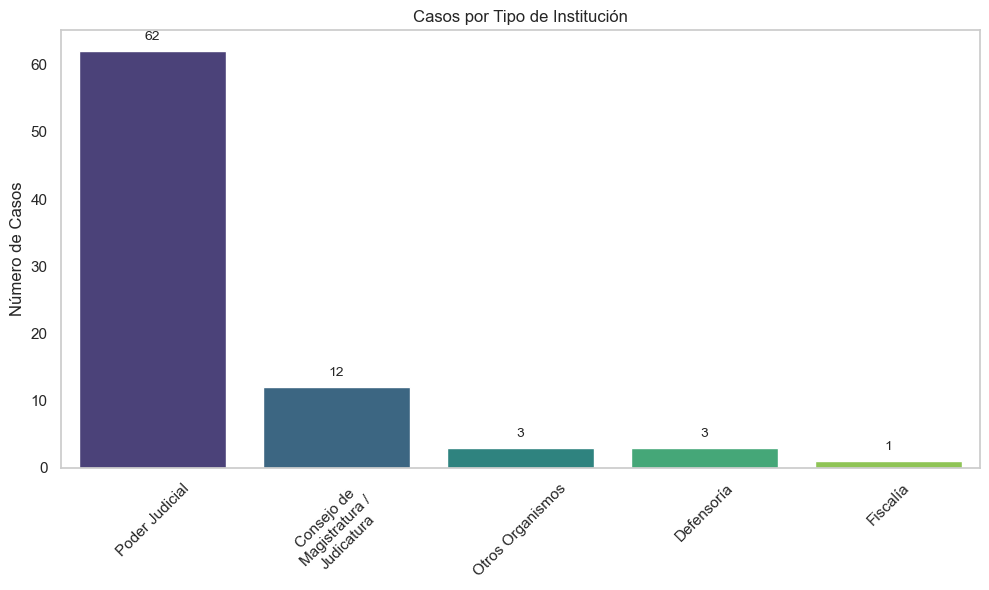

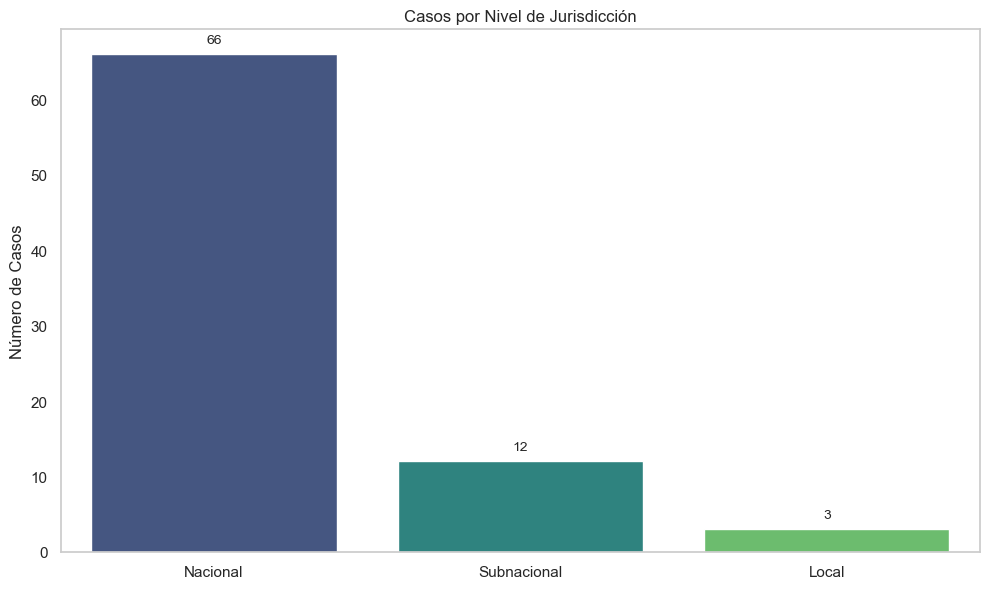

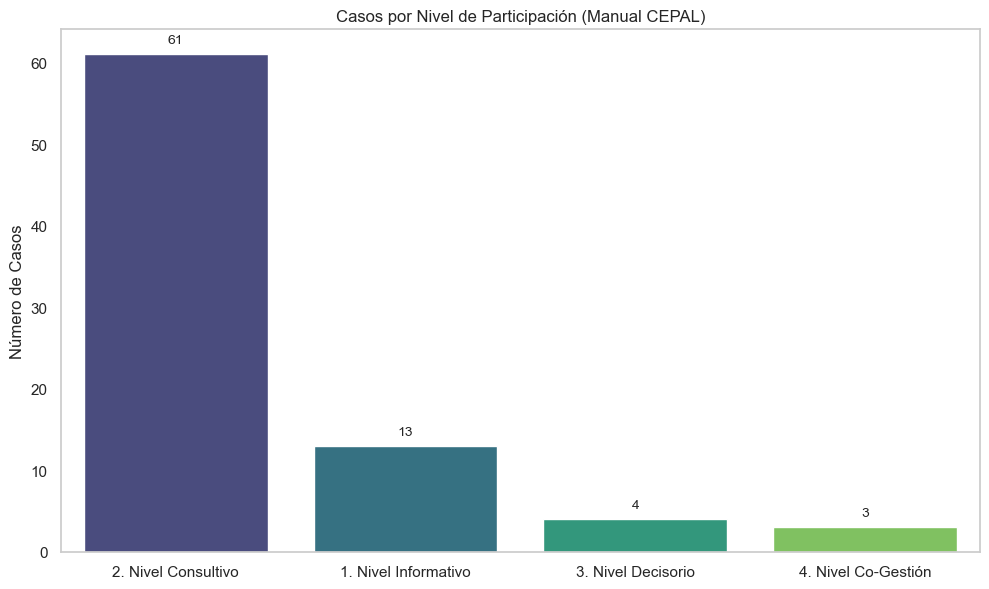

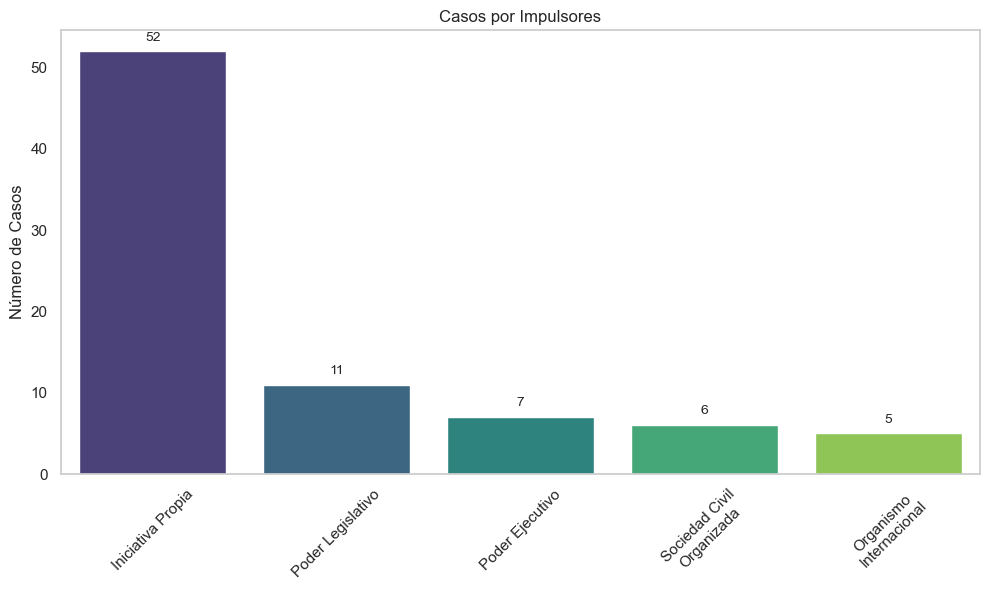

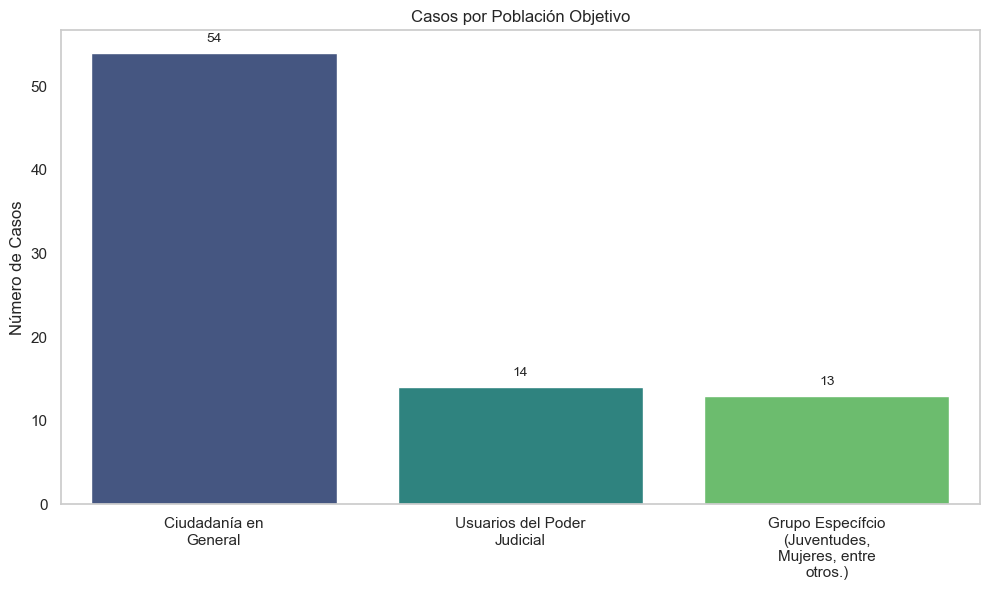

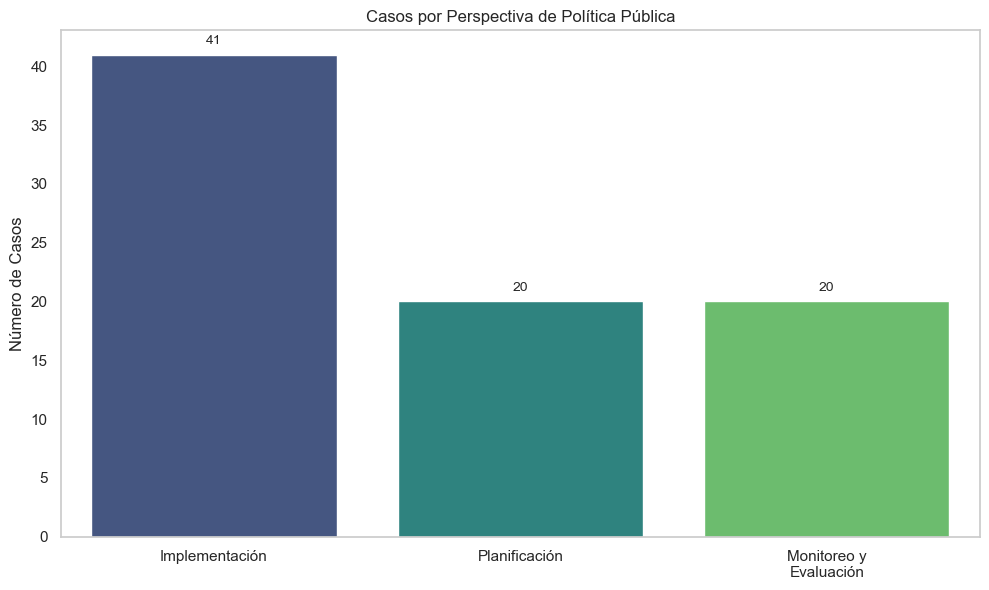

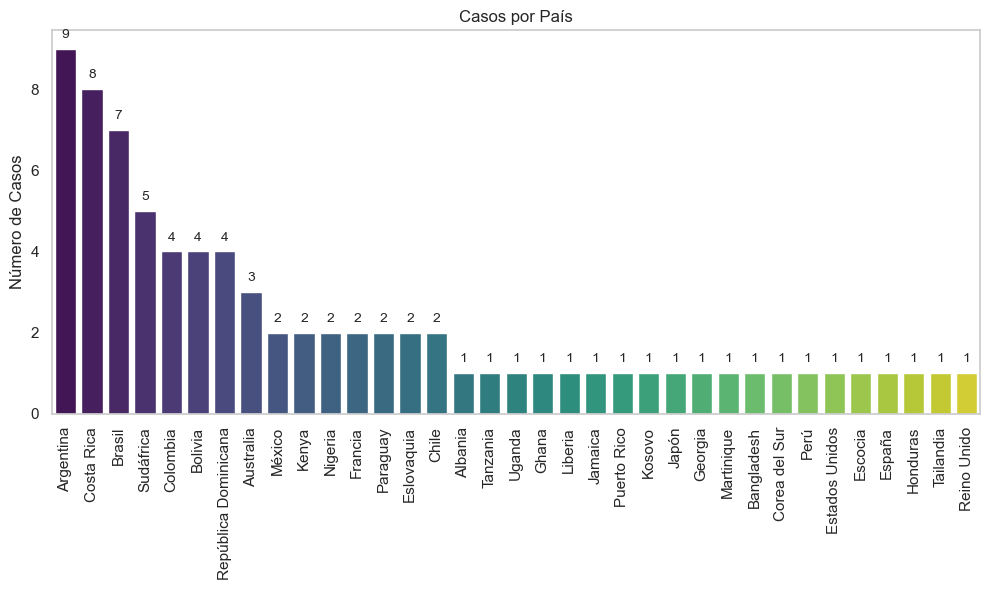

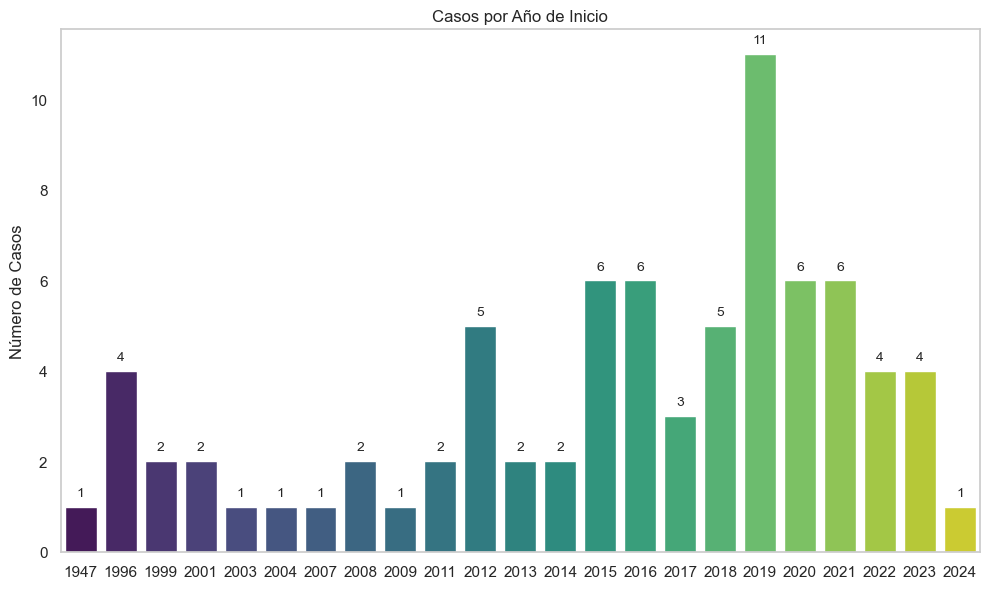

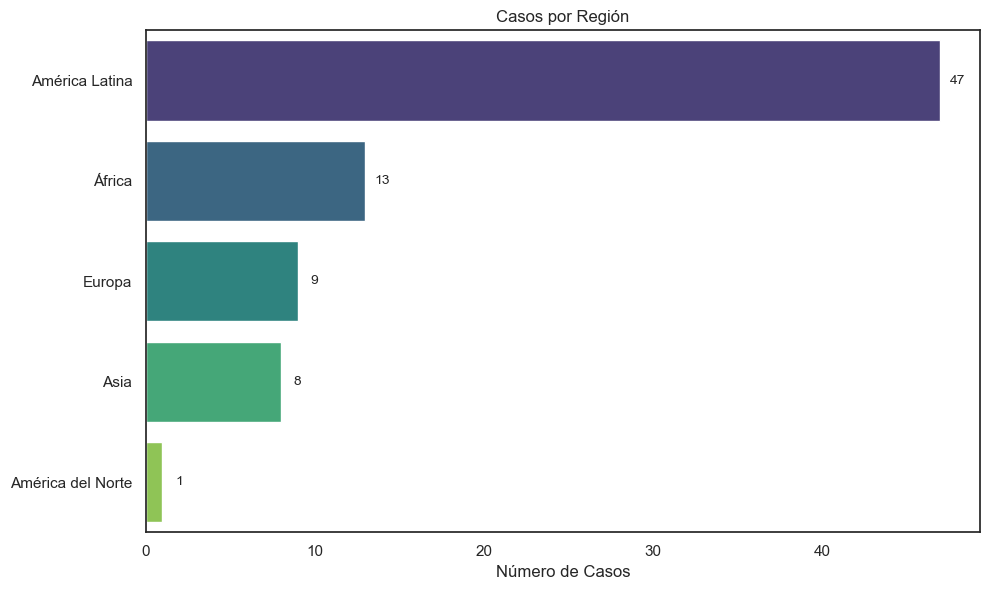

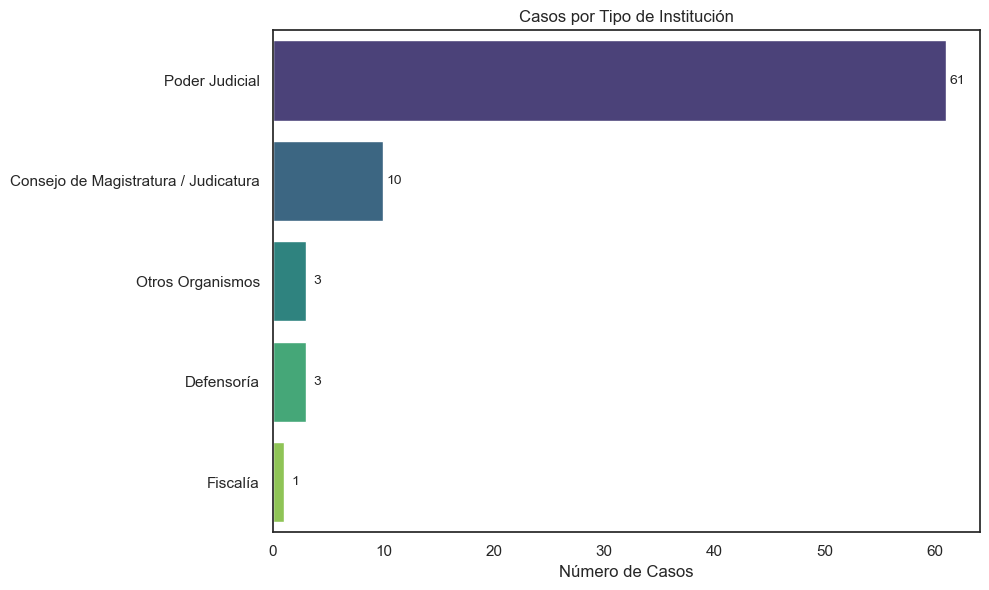

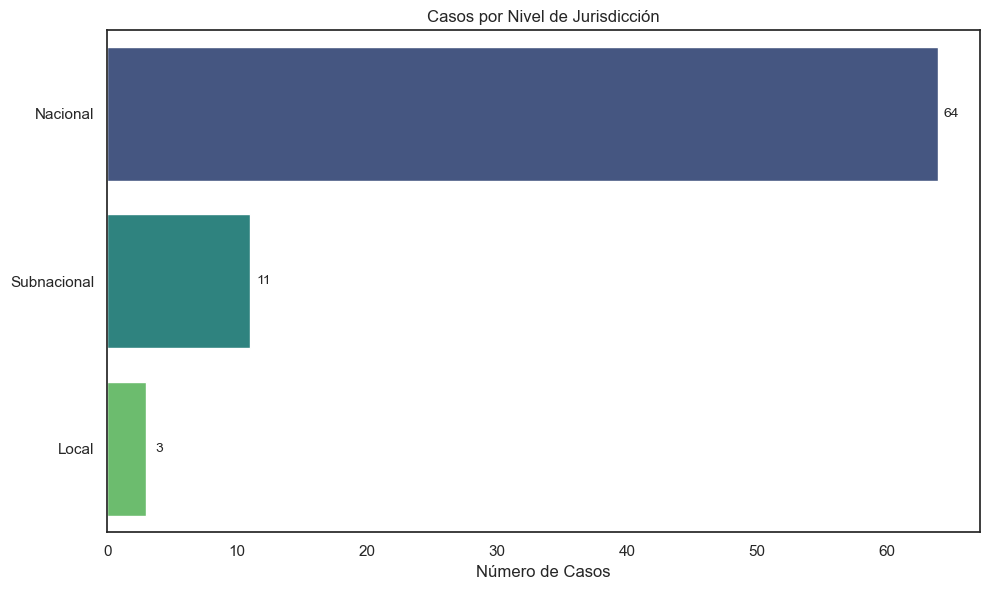

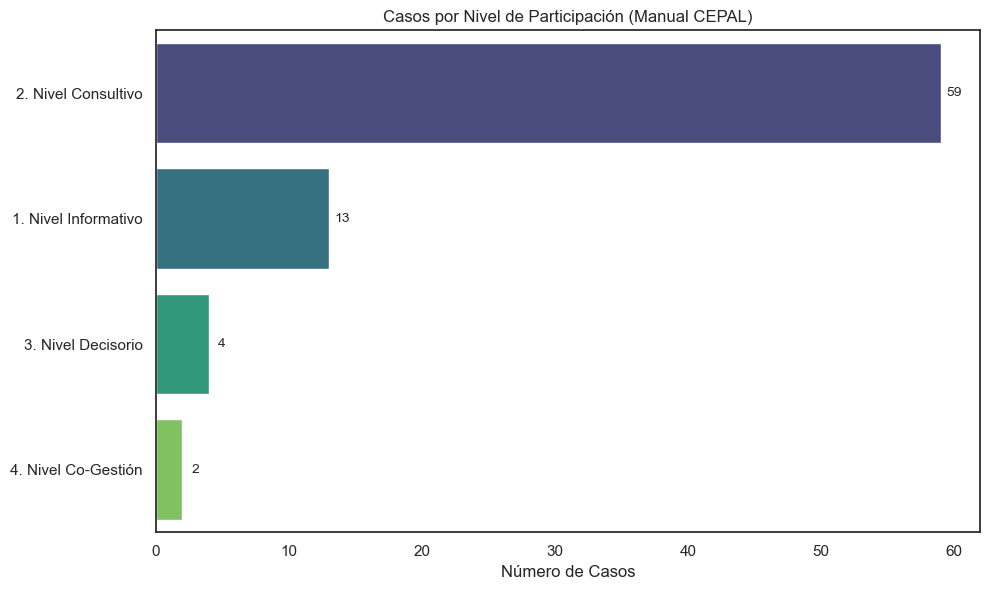

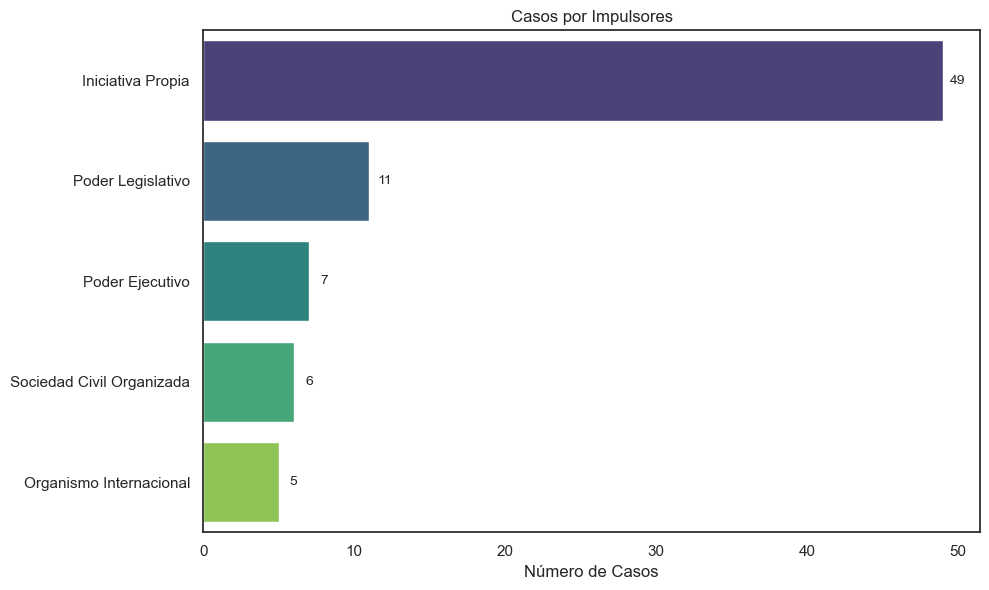

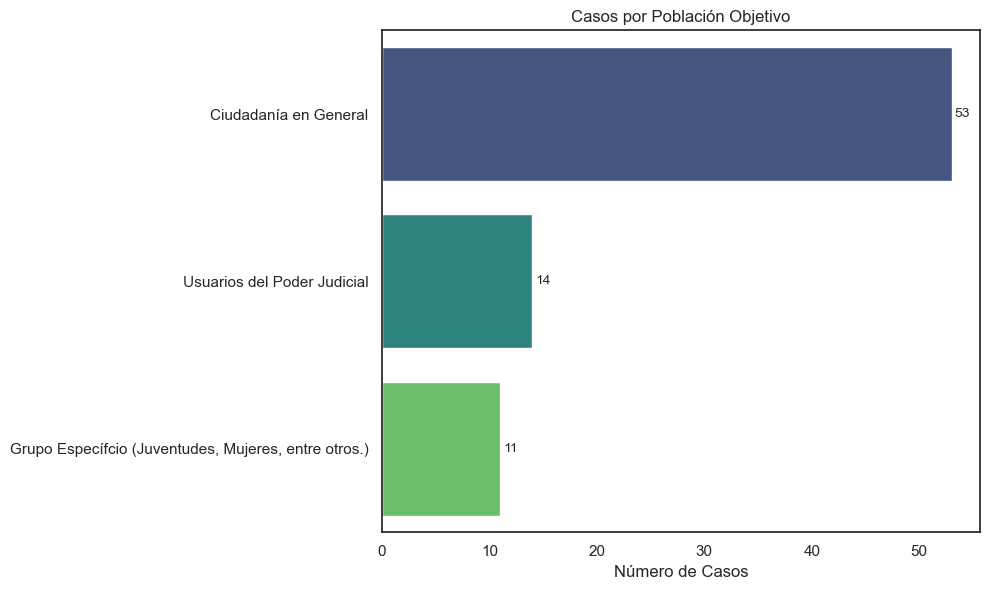

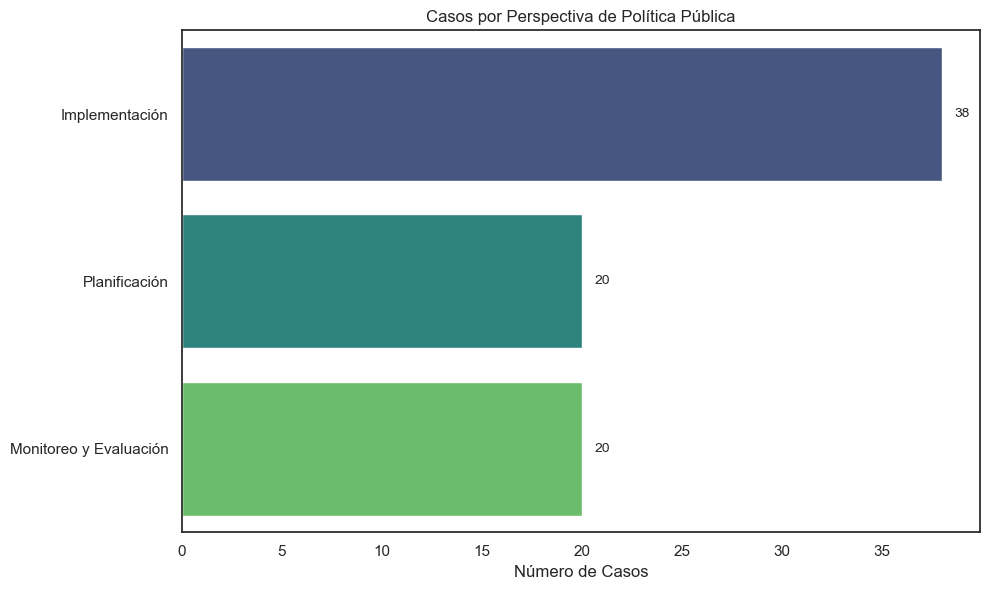

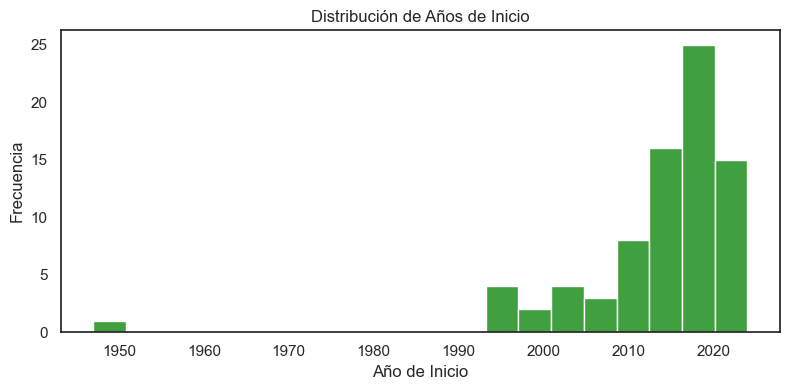

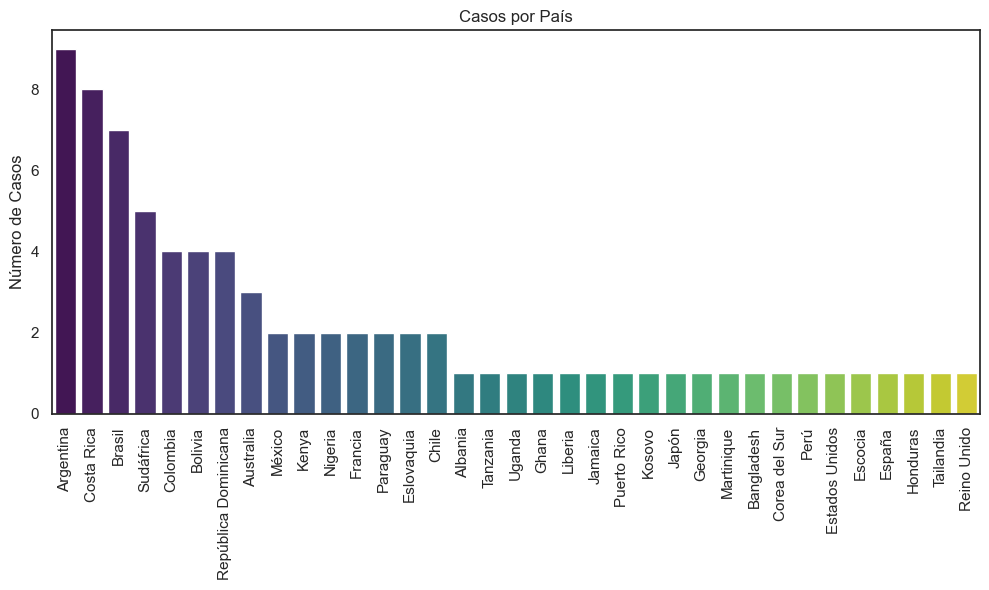

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Cargar los datos
data = pd.read_excel("RIJA _ Iniciativas de Participacion Ciu dadana en el Poder Judicial - Mapeo.xlsx",
                     sheet_name='Mapeo de Casos')

# Limpieza preliminar de los datos
data.dropna(how='all', inplace=True)
data.fillna(method='ffill', inplace=True)

# Configuración de los gráficos
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

# Variables categóricas para graficar
categorical_columns = [
    'Región', 'Tipo de Institución', 'Nivel de Jurisdicción',
    'Nivel de Participación (Manual CEPAL)', 'Impulsores',
    'Población Objetivo', 'Perspectiva de Política Pública'
]


def adjust_labels(ax, labels, rotation_angle=45):
    """Ajustar etiquetas para mejorar la presentación visual."""
    ax.set_xticklabels([textwrap.fill(label, width=20) for label in labels], rotation=rotation_angle, ha='center')


# Graficar cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Dimensiones aumentadas
    order = data[column].value_counts().sort_values(ascending=False).index
    ax = sns.countplot(x=column, data=data, order=order, palette='viridis')
    adjust_labels(ax, order, rotation_angle=0 if len(order) < 5 else 45)  # Rotación condicional
    plt.title(f'Casos por {column}')
    plt.xlabel('')
    plt.ylabel('Número de Casos')

    # Anotar valores sobre cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', xytext=(0, 10), textcoords='offset points')

    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Gráficos adicionales para "País" y "Año de Inicio"
additional_columns = ['País', 'Año de Inicio']
data['Año de Inicio'] = pd.to_numeric(data['Año de Inicio'], errors='coerce')
data.dropna(subset=['Año de Inicio'], inplace=True)
data['Año de Inicio'] = data['Año de Inicio'].astype(int)
years_sorted = sorted(data['Año de Inicio'].unique())

for column in additional_columns:
    plt.figure(figsize=(10, 6))
    if column == 'País':
        order = data[column].value_counts().sort_values(ascending=False).index
    else:
        order = years_sorted
    ax = sns.countplot(x=column, data=data, order=order, palette='viridis')
    adjust_labels(ax, [str(o) for o in order], rotation_angle=0 if column != 'País' else 90)
    plt.title(f'Casos por {column}')
    plt.xlabel('')
    plt.ylabel('Número de Casos')

    for p in ax.patches:  # Anotar valores sobre cada barra
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', xytext=(0, 10), textcoords='offset points')

    plt.grid(False)
    plt.tight_layout()
    plt.show()


# Variables categóricas para graficar
categorical_columns = [
    'Región', 'Tipo de Institución', 'Nivel de Jurisdicción',
    'Nivel de Participación (Manual CEPAL)', 'Impulsores',
    'Población Objetivo', 'Perspectiva de Política Pública'
]

# Configuración de los gráficos
sns.set(style="white")
plt.rcParams.update({'font.size': 10})

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    order = data[column].value_counts().sort_values(ascending=False).index
    sns.barplot(x=data[column].value_counts(), y=order, palette='viridis')
    plt.title(f'Casos por {column}')
    plt.xlabel('Número de Casos')
    plt.ylabel('')

    # Añadir anotaciones con conteo exacto
    ax = plt.gca()
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 1, p.get_y() + p.get_height() / 2., f'{int(width)}', ha='center', va='center')

    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Ejemplo usando gráficos simples para 'Año de Inicio' y 'País'
if 'Año de Inicio' in data.columns:
    data['Año de Inicio'] = pd.to_numeric(data['Año de Inicio'], errors='coerce')
    plt.figure(figsize=(8, 4))
    sns.histplot(data['Año de Inicio'], bins=20, color='green')
    plt.title('Distribución de Años de Inicio')
    plt.xlabel('Año de Inicio')
    plt.ylabel('Frecuencia')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
order_countries = data['País'].value_counts().sort_values(ascending=False).index
sns.barplot(y=data['País'].value_counts(), x=order_countries, palette='viridis')
plt.title("Casos por País")
plt.ylabel('Número de Casos')
plt.xlabel('')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

